In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/MPHARM/00_MPH/Final/RFR_top 50.xlsx")
df

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
0,4.176200,570.88,428.38,112.75,78.59,8833.86,9359.73,155.83,7.73,7.42,...,0.98,5.91,18,73,6.56,6.94,7.46,10.40,9.64,6.39
1,3.790995,570.62,435.11,110.23,80.10,8833.86,9332.53,156.32,7.74,7.41,...,0.98,5.91,18,70,6.57,6.93,7.45,10.36,9.64,6.39
2,3.657321,567.98,435.21,101.28,69.19,8934.19,9570.95,147.21,7.81,7.39,...,0.91,4.46,18,74,6.55,6.95,7.47,10.43,9.64,6.25
3,3.871568,566.31,429.10,106.70,81.10,8833.86,9359.71,159.79,7.73,7.35,...,0.99,5.91,18,74,6.55,6.95,7.47,10.43,9.64,6.39
4,4.356745,576.23,433.45,130.00,88.14,8793.67,9295.27,172.42,7.82,7.57,...,0.99,6.67,18,81,6.64,7.05,7.57,10.49,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,713.12,487.72,125.97,125.85,10722.42,9615.60,232.41,7.69,7.63,...,0.87,5.55,21,80,6.48,6.78,7.12,8.18,12.61,6.26
96,4.499078,773.49,574.98,125.25,127.70,11724.08,11796.07,204.38,7.60,7.56,...,0.91,4.82,21,80,6.48,6.78,7.12,8.18,12.61,6.79
97,4.376441,819.11,569.72,123.74,127.20,12000.15,11338.67,217.06,7.72,7.69,...,0.89,4.80,22,88,6.55,6.85,7.26,8.30,12.61,5.39
98,3.980344,759.25,527.23,135.52,126.40,10964.56,10478.25,225.56,7.73,7.71,...,0.97,7.17,26,120,6.99,7.32,7.60,9.85,15.21,5.49


In [ ]:
print(df.columns)

Index(['pCC50', 'ATS5e', 'ATS8e', 'ATS7p', 'ATS8p', 'ATS2i', 'ATS8i', 'AATS8v',
       'AATS3e', 'AATS7e', 'ATSC3c', 'ATSC6m', 'ATSC2e', 'ATSC3e', 'ATSC5e',
       'ATSC7e', 'ATSC8e', 'ATSC6p', 'ATSC4i', 'AATSC6m', 'AATSC5v', 'MATS6c',
       'MATS1m', 'MATS4m', 'MATS8m', 'MATS3e', 'MATS6e', 'MATS8e', 'MATS2p',
       'MATS3p', 'MATS6p', 'MATS2i', 'GATS4c', 'GATS4m', 'GATS5m', 'GATS6m',
       'GATS4v', 'GATS8v', 'GATS7p', 'GATS2i', 'GATS5i', 'GATS7i',
       'CrippenLogP', 'nAtomP', 'MPC9', 'piPC7', 'piPC8', 'piPC10',
       'R_TpiPCTPC', 'WTPT-5', 'XLogP'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS5e        100 non-null    float64
 2   ATS8e        100 non-null    float64
 3   ATS7p        100 non-null    float64
 4   ATS8p        100 non-null    float64
 5   ATS2i        100 non-null    float64
 6   ATS8i        100 non-null    float64
 7   AATS8v       100 non-null    float64
 8   AATS3e       100 non-null    float64
 9   AATS7e       100 non-null    float64
 10  ATSC3c       100 non-null    float64
 11  ATSC6m       100 non-null    float64
 12  ATSC2e       100 non-null    float64
 13  ATSC3e       100 non-null    float64
 14  ATSC5e       100 non-null    float64
 15  ATSC7e       100 non-null    float64
 16  ATSC8e       100 non-null    float64
 17  ATSC6p       100 non-null    float64
 18  ATSC4i       100 non-null    float64
 19  AATSC6m  

In [ ]:
df.isnull()

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pCC50          0
ATS5e          0
ATS8e          0
ATS7p          0
ATS8p          0
ATS2i          0
ATS8i          0
AATS8v         0
AATS3e         0
AATS7e         0
ATSC3c         0
ATSC6m         0
ATSC2e         0
ATSC3e         0
ATSC5e         0
ATSC7e         0
ATSC8e         0
ATSC6p         0
ATSC4i         0
AATSC6m        0
AATSC5v        0
MATS6c         0
MATS1m         0
MATS4m         0
MATS8m         0
MATS3e         0
MATS6e         0
MATS8e         0
MATS2p         0
MATS3p         0
MATS6p         0
MATS2i         0
GATS4c         0
GATS4m         0
GATS5m         0
GATS6m         0
GATS4v         0
GATS8v         0
GATS7p         0
GATS2i         0
GATS5i         0
GATS7i         0
CrippenLogP    0
nAtomP         0
MPC9           0
piPC7          0
piPC8          0
piPC10         0
R_TpiPCTPC     0
WTPT-5         0
XLogP          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
0,4.176200,570.88,428.38,112.75,78.59,8833.86,9359.73,155.83,7.73,7.42,...,0.98,5.91,18,73,6.56,6.94,7.46,10.40,9.64,6.39
1,3.790995,570.62,435.11,110.23,80.10,8833.86,9332.53,156.32,7.74,7.41,...,0.98,5.91,18,70,6.57,6.93,7.45,10.36,9.64,6.39
2,3.657321,567.98,435.21,101.28,69.19,8934.19,9570.95,147.21,7.81,7.39,...,0.91,4.46,18,74,6.55,6.95,7.47,10.43,9.64,6.25
3,3.871568,566.31,429.10,106.70,81.10,8833.86,9359.71,159.79,7.73,7.35,...,0.99,5.91,18,74,6.55,6.95,7.47,10.43,9.64,6.39
4,4.356745,576.23,433.45,130.00,88.14,8793.67,9295.27,172.42,7.82,7.57,...,0.99,6.67,18,81,6.64,7.05,7.57,10.49,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,713.12,487.72,125.97,125.85,10722.42,9615.60,232.41,7.69,7.63,...,0.87,5.55,21,80,6.48,6.78,7.12,8.18,12.61,6.26
96,4.499078,773.49,574.98,125.25,127.70,11724.08,11796.07,204.38,7.60,7.56,...,0.91,4.82,21,80,6.48,6.78,7.12,8.18,12.61,6.79
97,4.376441,819.11,569.72,123.74,127.20,12000.15,11338.67,217.06,7.72,7.69,...,0.89,4.80,22,88,6.55,6.85,7.26,8.30,12.61,5.39
98,3.980344,759.25,527.23,135.52,126.40,10964.56,10478.25,225.56,7.73,7.71,...,0.97,7.17,26,120,6.99,7.32,7.60,9.85,15.21,5.49


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS5e        100 non-null    float64
 2   ATS8e        100 non-null    float64
 3   ATS7p        100 non-null    float64
 4   ATS8p        100 non-null    float64
 5   ATS2i        100 non-null    float64
 6   ATS8i        100 non-null    float64
 7   AATS8v       100 non-null    float64
 8   AATS3e       100 non-null    float64
 9   AATS7e       100 non-null    float64
 10  ATSC3c       100 non-null    float64
 11  ATSC6m       100 non-null    float64
 12  ATSC2e       100 non-null    float64
 13  ATSC3e       100 non-null    float64
 14  ATSC5e       100 non-null    float64
 15  ATSC7e       100 non-null    float64
 16  ATSC8e       100 non-null    float64
 17  ATSC6p       100 non-null    float64
 18  ATSC4i       100 non-null    float64
 19  AATSC6m  

In [ ]:
df2.describe()

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
count,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,4.152151,622.628500,462.96970,106.98030,88.228400,9729.949200,9767.487500,180.300800,7.764500,7.582900,...,0.993200,5.194100,17.300000,75.930000,6.467500,6.814900,7.258400,9.383700,10.54910,5.668800
std,0.399805,106.459305,106.75178,23.88185,24.129999,1291.070624,2293.038724,41.883558,0.148442,0.211871,...,0.095303,1.039737,3.891197,21.775371,0.426298,0.446812,0.539711,1.880488,1.45854,1.093768
min,3.443866,94.180000,7.54000,12.99000,2.790000,2952.110000,126.790000,86.720000,7.470000,7.180000,...,0.550000,0.520000,11.000000,20.000000,4.840000,5.150000,5.320000,4.610000,9.45000,3.310000
25%,3.794065,565.605000,414.55000,93.63250,78.580000,8833.860000,8584.582500,154.112500,7.677500,7.407500,...,0.930000,4.672500,15.000000,66.750000,6.390000,6.650000,6.950000,7.760000,9.63750,4.962500
50%,4.278946,638.575000,466.18500,112.42000,89.620000,9791.315000,9593.275000,173.285000,7.740000,7.605000,...,0.990000,5.255000,18.000000,74.000000,6.530000,6.890000,7.445000,10.150000,9.65500,5.765000
75%,4.461207,701.305000,522.02750,120.23000,103.925000,10714.612500,10862.300000,207.710000,7.852500,7.735000,...,1.052500,5.910000,21.000000,83.000000,6.652500,7.042500,7.570000,10.537500,12.13000,6.415000
max,5.154902,819.110000,723.85000,182.13000,143.340000,12000.150000,15892.280000,423.520000,8.280000,8.090000,...,1.210000,7.540000,26.000000,145.000000,7.270000,7.750000,8.480000,14.780000,15.21000,8.870000


In [ ]:
df2.head()

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
0,4.176200,570.88,428.38,112.75,78.59,8833.86,9359.73,155.83,7.73,7.42,...,0.98,5.91,18,73,6.56,6.94,7.46,10.40,9.64,6.39
1,3.790995,570.62,435.11,110.23,80.10,8833.86,9332.53,156.32,7.74,7.41,...,0.98,5.91,18,70,6.57,6.93,7.45,10.36,9.64,6.39
2,3.657321,567.98,435.21,101.28,69.19,8934.19,9570.95,147.21,7.81,7.39,...,0.91,4.46,18,74,6.55,6.95,7.47,10.43,9.64,6.25
3,3.871568,566.31,429.10,106.70,81.10,8833.86,9359.71,159.79,7.73,7.35,...,0.99,5.91,18,74,6.55,6.95,7.47,10.43,9.64,6.39
4,4.356745,576.23,433.45,130.00,88.14,8793.67,9295.27,172.42,7.82,7.57,...,0.99,6.67,18,81,6.64,7.05,7.57,10.49,9.64,6.19


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
pCC50,100.0,4.152151,0.399805,3.443866,3.794065,4.278946,4.461207,5.154902
ATS5e,100.0,622.628500,106.459305,94.180000,565.605000,638.575000,701.305000,819.110000
ATS8e,100.0,462.969700,106.751780,7.540000,414.550000,466.185000,522.027500,723.850000
ATS7p,100.0,106.980300,23.881850,12.990000,93.632500,112.420000,120.230000,182.130000
ATS8p,100.0,88.228400,24.129999,2.790000,78.580000,89.620000,103.925000,143.340000
ATS2i,100.0,9729.949200,1291.070624,2952.110000,8833.860000,9791.315000,10714.612500,12000.150000
ATS8i,100.0,9767.487500,2293.038724,126.790000,8584.582500,9593.275000,10862.300000,15892.280000
AATS8v,100.0,180.300800,41.883558,86.720000,154.112500,173.285000,207.710000,423.520000
AATS3e,100.0,7.764500,0.148442,7.470000,7.677500,7.740000,7.852500,8.280000
AATS7e,100.0,7.582900,0.211871,7.180000,7.407500,7.605000,7.735000,8.090000


In [ ]:
X = df2.drop(['pCC50'],axis = 1)
X

,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,ATSC3c,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
0,570.88,428.38,112.75,78.59,8833.86,9359.73,155.83,7.73,7.42,0.00,...,0.98,5.91,18,73,6.56,6.94,7.46,10.40,9.64,6.39
1,570.62,435.11,110.23,80.10,8833.86,9332.53,156.32,7.74,7.41,0.10,...,0.98,5.91,18,70,6.57,6.93,7.45,10.36,9.64,6.39
2,567.98,435.21,101.28,69.19,8934.19,9570.95,147.21,7.81,7.39,0.04,...,0.91,4.46,18,74,6.55,6.95,7.47,10.43,9.64,6.25
3,566.31,429.10,106.70,81.10,8833.86,9359.71,159.79,7.73,7.35,0.04,...,0.99,5.91,18,74,6.55,6.95,7.47,10.43,9.64,6.39
4,576.23,433.45,130.00,88.14,8793.67,9295.27,172.42,7.82,7.57,0.00,...,0.99,6.67,18,81,6.64,7.05,7.57,10.49,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,713.12,487.72,125.97,125.85,10722.42,9615.60,232.41,7.69,7.63,0.06,...,0.87,5.55,21,80,6.48,6.78,7.12,8.18,12.61,6.26
96,773.49,574.98,125.25,127.70,11724.08,11796.07,204.38,7.60,7.56,0.05,...,0.91,4.82,21,80,6.48,6.78,7.12,8.18,12.61,6.79
97,819.11,569.72,123.74,127.20,12000.15,11338.67,217.06,7.72,7.69,0.08,...,0.89,4.80,22,88,6.55,6.85,7.26,8.30,12.61,5.39
98,759.25,527.23,135.52,126.40,10964.56,10478.25,225.56,7.73,7.71,0.04,...,0.97,7.17,26,120,6.99,7.32,7.60,9.85,15.21,5.49


In [ ]:
Y = df2.pCC50
Y

0     4.176200
1     3.790995
2     3.657321
3     3.871568
4     4.356745
        ...   
95    4.700929
96    4.499078
97    4.376441
98    3.980344
99    4.311669
Name: pCC50, Length: 100, dtype: float64

In [ ]:
X.shape

(100, 50)

In [ ]:
Y.shape

(100,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
pCC50,1.000000,0.351186,0.347437,0.427323,0.430463,0.321291,0.340336,0.032250,-0.391591,-0.239592,...,-0.198062,0.440497,0.397689,0.432550,0.459205,0.480084,0.491551,0.458949,0.111401,0.471954
ATS5e,0.351186,1.000000,0.852842,0.713039,0.822373,0.963339,0.790710,0.026320,-0.498932,0.042986,...,0.208962,0.436475,0.330087,0.751692,0.763306,0.730486,0.669341,0.471693,0.322005,0.502818
ATS8e,0.347437,0.852842,1.000000,0.856264,0.844432,0.798355,0.984784,-0.130565,-0.559299,-0.145589,...,0.157816,0.438639,0.504994,0.771900,0.788074,0.780149,0.764623,0.611146,0.202428,0.574079
ATS7p,0.427323,0.713039,0.856264,1.000000,0.890555,0.589990,0.822929,-0.006969,-0.476075,-0.135338,...,-0.022362,0.716718,0.685555,0.840690,0.827531,0.832417,0.810158,0.667852,0.307316,0.704961
ATS8p,0.430463,0.822373,0.844432,0.890555,1.000000,0.755360,0.763723,0.240963,-0.476122,0.049566,...,-0.047556,0.624111,0.636028,0.783530,0.770580,0.738552,0.663332,0.460846,0.497319,0.596217
ATS2i,0.321291,0.963339,0.798355,0.589990,0.755360,1.000000,0.737023,0.011627,-0.515762,0.032346,...,0.299645,0.384424,0.160975,0.624178,0.662430,0.619775,0.544526,0.350129,0.238331,0.437850
ATS8i,0.340336,0.790710,0.984784,0.822929,0.763723,0.737023,1.000000,-0.255339,-0.621337,-0.278806,...,0.168232,0.403090,0.487626,0.722529,0.751066,0.757942,0.765755,0.650967,0.109677,0.592230
AATS8v,0.032250,0.026320,-0.130565,-0.006969,0.240963,0.011627,-0.255339,1.000000,0.348082,0.589943,...,-0.379710,0.025226,0.020308,0.142868,0.074994,0.009968,-0.097465,-0.208432,0.403210,-0.050714
AATS3e,-0.391591,-0.498932,-0.559299,-0.476075,-0.476122,-0.515762,-0.621337,0.348082,1.000000,0.747682,...,-0.109843,-0.411227,-0.344763,-0.370894,-0.447625,-0.482787,-0.489250,-0.532750,-0.002762,-0.704238
AATS7e,-0.239592,0.042986,-0.145589,-0.135338,0.049566,0.032346,-0.278806,0.589943,0.747682,1.000000,...,0.055864,-0.157945,-0.151644,0.015721,-0.022968,-0.106041,-0.192043,-0.368826,0.367109,-0.498375


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,pCC50,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,ATSC3c,ATSC6m,ATSC2e,ATSC3e,ATSC5e,ATSC7e,ATSC8e,ATSC6p,ATSC4i,AATSC6m,AATSC5v,MATS6c,MATS1m,MATS4m,MATS8m,MATS3e,MATS6e,MATS8e,MATS2p,MATS3p,MATS6p,MATS2i,GATS4c,GATS4m,GATS5m,GATS6m,GATS4v,GATS8v,GATS7p,GATS2i,GATS5i,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
pCC50,1.000000,0.351186,0.347437,0.427323,0.430463,0.321291,0.340336,0.032250,-0.391591,-0.239592,0.229821,-0.113507,-0.105915,0.313824,-0.072591,-0.001370,0.107237,-0.055652,-0.245659,-0.102039,-0.061516,0.060327,0.057611,0.428956,0.155008,0.285190,-0.096521,0.075964,0.094055,-0.178379,-0.050010,0.187354,0.080492,-0.380954,-0.155301,0.025360,-0.355203,0.075835,0.087074,-0.330440,0.397477,-0.198062,0.440497,0.397689,0.432550,0.459205,0.480084,0.491551,0.458949,0.111401,0.471954
ATS5e,0.351186,1.000000,0.852842,0.713039,0.822373,0.963339,0.790710,0.026320,-0.498932,0.042986,0.053568,-0.130559,0.400686,0.112094,0.200329,-0.072407,-0.313281,-0.031864,-0.357021,-0.091404,-0.073340,-0.232886,0.053382,0.372719,-0.209301,0.393229,-0.189266,-0.393602,-0.068237,0.140346,-0.088086,0.295967,0.022301,-0.051931,0.009364,0.481513,-0.257408,0.160388,0.200698,-0.423255,0.420663,0.208962,0.436475,0.330087,0.751692,0.763306,0.730486,0.669341,0.471693,0.322005,0.502818
ATS8e,0.347437,0.852842,1.000000,0.856264,0.844432,0.798355,0.984784,-0.130565,-0.559299,-0.145589,0.122968,-0.138468,0.323290,0.216157,-0.099507,0.225139,-0.319634,0.044466,-0.259424,-0.092144,-0.206460,-0.045354,-0.071840,0.586212,-0.228053,0.459019,-0.134239,-0.351624,0.048422,-0.031949,0.013068,0.265379,-0.064414,-0.264311,0.097693,0.367894,-0.559024,0.256072,0.152703,-0.391210,0.578941,0.157816,0.438639,0.504994,0.771900,0.788074,0.780149,0.764623,0.611146,0.202428,0.574079
ATS7p,0.427323,0.713039,0.856264,1.000000,0.890555,0.589990,0.822929,-0.006969,-0.476075,-0.135338,0.074848,-0.278194,0.292061,0.252940,-0.203971,0.299364,-0.221882,-0.107516,-0.189164,-0.242885,-0.093947,-0.074804,-0.359305,0.602704,-0.180176,0.394302,-0.192550,-0.265076,-0.126782,-0.018294,-0.158716,-0.104999,0.049952,-0.522767,-0.139746,0.276107,-0.603355,0.367932,0.154095,-0.093462,0.680626,-0.022362,0.716718,0.685555,0.840690,0.827531,0.832417,0.810158,0.667852,0.307316,0.704961
ATS8p,0.430463,0.822373,0.844432,0.890555,1.000000,0.755360,0.763723,0.240963,-0.476122,0.049566,0.196004,-0.374252,0.291994,0.231160,0.085279,0.141006,-0.354549,-0.197804,-0.451223,-0.350491,0.121205,-0.269444,-0.198406,0.472236,-0.218459,0.416082,-0.359304,-0.423243,-0.117832,-0.102922,-0.245704,0.111480,0.023609,-0.352392,-0.320968,0.363336,-0.324589,0.236907,-0.014358,-0.307200,0.662554,-0.047556,0.624111,0.636028,0.783530,0.770580,0.738552,0.663332,0.460846,0.497319,0.596217
ATS2i,0.321291,0.963339,0.798355,0.589990,0.755360,1.000000,0.737023,0.011627,-0.515762,0.032346,0.098525,-0.117826,0.343903,0.087585,0.352441,-0.176748,-0.320465,-0.041011,-0.334782,-0.081231,-0.057257,-0.343348,0.192802,0.308579,-0.243067,0.371317,-0.280093,-0.431637,-0.033564,0.147277,-0.089697,0.396027,0.118746,0.096145,0.032049,0.484104,-0.185925,0.111754,0.139300,-0.499043,0.336226,0.299645,0.384424,0.160975,0.624178,0.662430,0.619775,0.544526,0.350129,0.238331,0.437850
ATS8i,0.340336,0.790710,0.984784,0.822929,0.763723,0.737023,1.000000,-0.255339,-0.621337,-0.278806,0.117557,-0.085308,0.279410,0.267187,-0.197750,0.232641,-0.269107,0.107962,-0.210273,-0.032653,-0.266533,0.067355,-0.054294,0.631734,-0.220983,0.483904,-0.089099,-0.296595,0.099612,-0.056225,0.089566,0.272005,-0.046630,-0.288473,0.192736,0.341743,-0.631601,0.283364,0.208588,-0.380671,0.558590,0.168232,0.403090,0.487626,0.722529,0.751066,0.757942,0.765755,0.650967,0.109677,0.592230
AATS8v,0.032250,0.026320,-0.130565,-0.006969,0.240963,0.011627,-0.255339,1.000000,0.348082,0.589943,0.059226,-0.236498,0.000017,-0.141647,0.486176,-0.149264,-0.165423,-0.315101,-0.301162,-0.265386,0.237606,-0.442380,0.148403,-0.347803,0.185298,-0.099055,-0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(80, 50) (20, 50) (80,) (20,)


In [ ]:
X_train

,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,ATSC3c,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
55,668.38,597.68,117.38,98.10,10451.46,12704.29,163.67,7.82,7.73,0.09,...,1.09,4.78,21,92,6.75,7.12,7.72,10.69,9.69,5.10
88,607.24,486.87,115.73,106.56,9786.94,10020.67,203.07,7.74,7.69,0.03,...,1.01,5.36,21,74,6.46,6.76,7.09,8.41,12.61,6.24
26,476.62,300.52,78.03,43.57,8017.52,6304.79,143.51,8.14,7.63,0.06,...,0.94,3.35,15,45,5.62,5.96,6.41,6.16,9.57,3.35
42,94.18,7.54,12.99,2.79,2952.11,126.79,423.52,8.28,7.79,0.03,...,0.55,0.52,11,20,4.84,5.15,5.32,4.61,9.47,3.31
69,639.67,390.19,95.13,74.33,10198.62,7978.00,207.68,7.77,7.71,-0.02,...,1.07,5.04,11,61,6.30,6.57,6.83,7.65,9.61,4.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,708.72,483.86,112.34,93.67,10838.02,9983.22,202.28,7.69,7.61,0.04,...,1.13,6.22,15,111,7.04,7.47,8.01,12.58,9.65,6.80
71,602.38,458.94,90.96,83.59,10198.62,9555.51,189.09,7.78,7.64,0.04,...,1.17,4.98,11,61,6.30,6.57,6.83,7.65,9.61,5.12
14,630.88,510.42,110.18,84.23,9361.28,10725.34,165.99,7.81,7.52,0.00,...,1.06,4.98,21,87,6.67,7.01,7.61,10.20,12.69,6.18
92,606.42,485.39,119.21,108.09,9760.96,9988.21,204.42,7.71,7.66,0.03,...,1.01,5.47,21,74,6.46,6.76,7.09,8.41,12.61,6.57


In [ ]:
Y_train

55    4.479516
88    3.980344
26    4.311580
42    3.454174
69    3.797239
        ...   
60    4.515415
71    4.472757
14    4.316413
92    3.930369
51    4.434270
Name: pCC50, Length: 80, dtype: float64

In [ ]:
X_test

,ATS5e,ATS8e,ATS7p,ATS8p,ATS2i,ATS8i,AATS8v,AATS3e,AATS7e,ATSC3c,...,GATS7i,CrippenLogP,nAtomP,MPC9,piPC7,piPC8,piPC10,R_TpiPCTPC,WTPT-5,XLogP
83,648.57,439.00,117.28,116.08,9760.96,8665.82,239.43,7.71,7.68,0.07,...,0.86,5.52,21,76,6.45,6.77,7.08,8.40,12.61,5.94
53,647.98,553.08,109.86,90.85,9728.31,11992.00,156.56,7.81,7.71,0.00,...,1.01,4.09,21,87,6.73,7.09,7.67,10.89,12.11,4.05
70,607.11,462.29,88.25,80.02,10298.96,9685.01,184.26,7.85,7.67,0.07,...,0.99,4.47,11,61,6.30,6.57,6.83,7.65,9.61,4.98
45,596.20,464.78,93.80,78.25,9750.55,10419.21,145.58,7.53,7.25,0.05,...,1.02,4.99,18,64,6.46,6.84,7.38,10.50,9.68,6.40
44,437.59,285.01,53.21,37.68,8219.09,6663.66,100.21,7.64,7.22,0.05,...,1.21,3.36,12,26,5.26,5.63,5.90,6.31,9.48,3.92
39,541.31,386.53,101.65,78.55,8734.68,8370.28,177.32,7.76,7.55,0.02,...,0.98,6.38,18,71,6.54,6.95,7.49,10.56,9.68,5.76
22,700.46,617.43,137.41,108.42,10733.73,13552.71,145.51,7.52,7.22,0.05,...,0.95,5.76,18,82,6.60,7.00,7.52,10.15,9.72,7.18
80,742.85,466.97,91.54,86.46,11002.12,9415.62,209.12,7.98,8.07,-0.01,...,1.05,4.08,12,73,6.46,6.68,7.04,7.57,12.68,4.79
10,753.74,555.52,122.57,104.42,10771.00,12021.01,160.16,7.57,7.31,0.04,...,0.93,5.31,18,83,6.60,6.99,7.55,10.22,9.64,7.15
0,570.88,428.38,112.75,78.59,8833.86,9359.73,155.83,7.73,7.42,0.00,...,0.98,5.91,18,73,6.56,6.94,7.46,10.40,9.64,6.39


In [ ]:
Y_test

83    4.566390
53    3.584192
70    4.421705
45    4.567993
44    3.505678
39    4.784891
22    4.271241
80    3.793255
10    4.255081
0     4.176200
18    3.742826
30    4.340750
73    4.092696
33    3.727857
90    5.154902
4     4.356745
76    4.377061
77    3.475799
12    4.353694
31    4.171598
Name: pCC50, dtype: float64

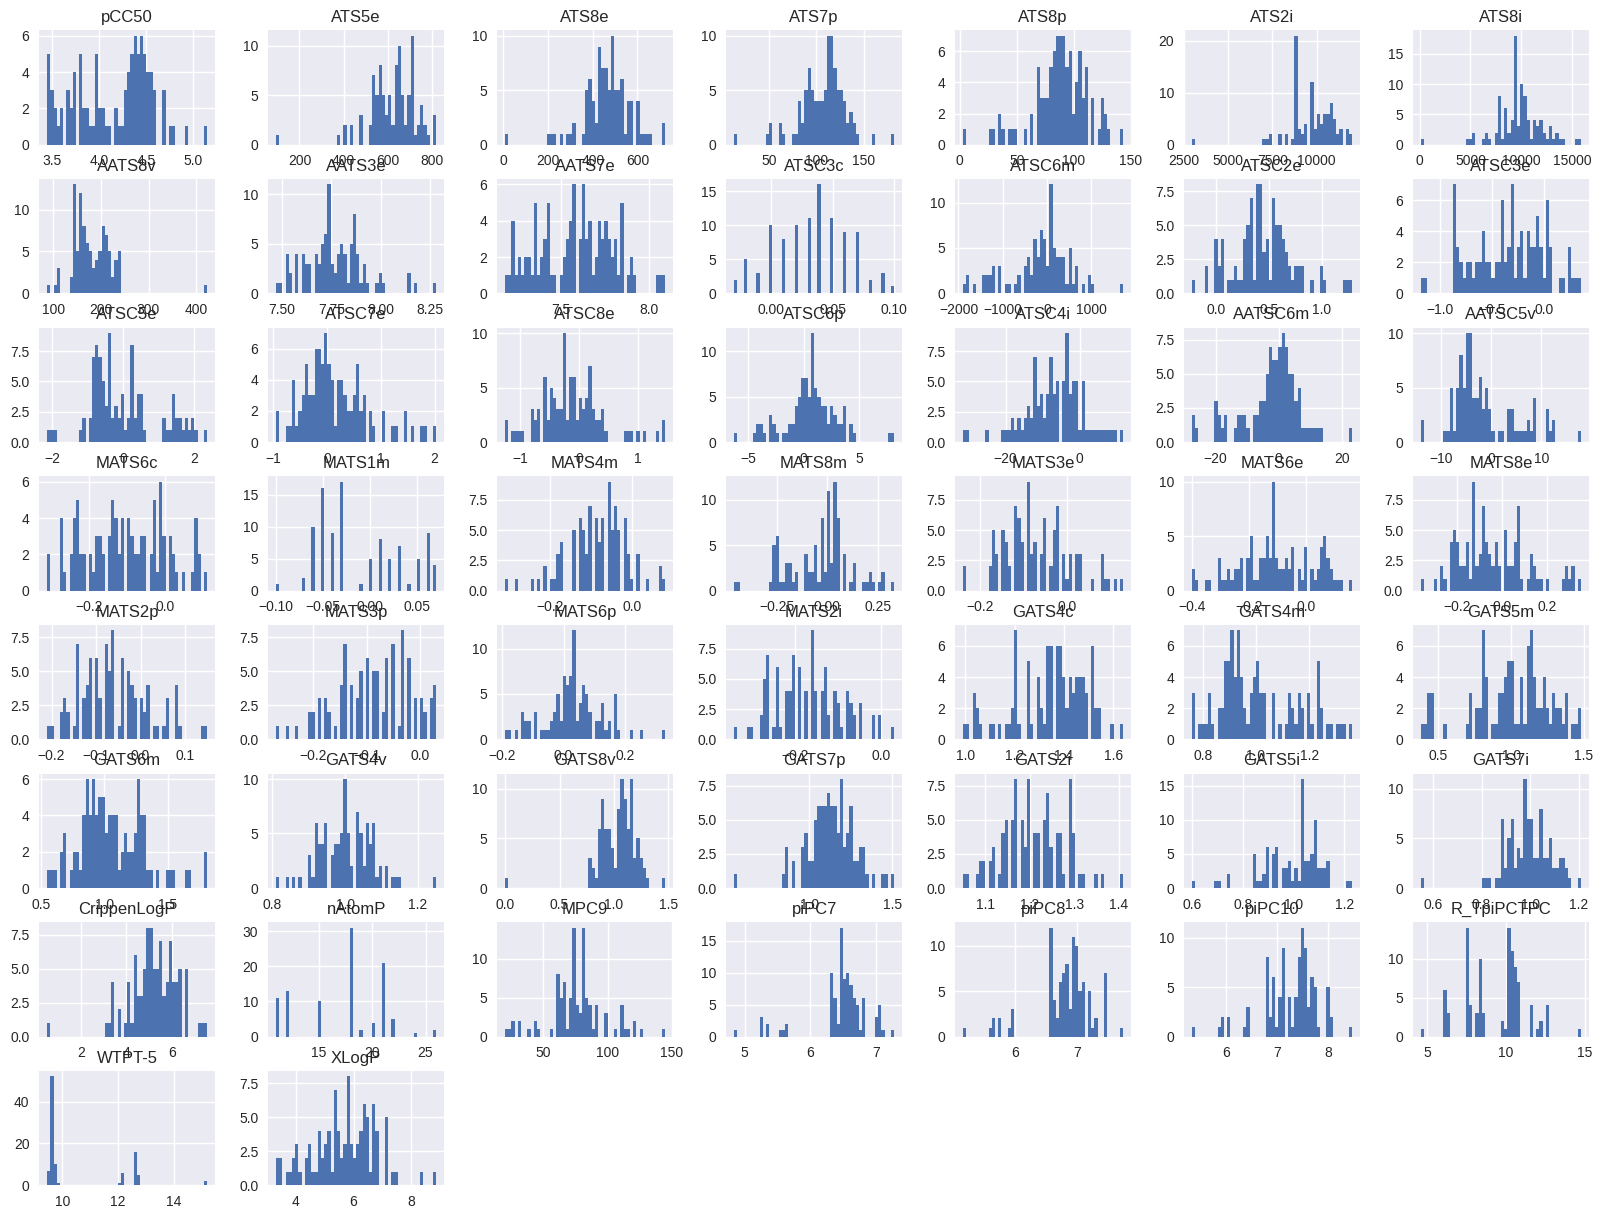

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('figrfr1.png')
plt.show()

In [ ]:
model = RandomForestRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.39552456 4.01413803 4.12606147 3.60867152 3.81765013 4.01566395
 4.71643607 4.39562683 3.88482025 4.22692365 4.29910419 4.46277612
 4.57255703 4.41393405 4.46418937 4.42386252 3.55852265 3.52759103
 4.43517104 4.06022747 4.4969771  4.16625241 4.36877033 4.61325151
 3.87199286 3.62085203 3.63531839 3.70839872 4.4459932  3.98873134
 3.81839285 3.9555676  3.64899641 4.56947592 4.19758787 3.63846167
 4.41161781 3.50937235 4.40585998 4.08685346 3.96057242 4.30312825
 3.97880166 3.69170487 4.41117005 3.81411813 4.43225334 3.57517586
 4.51548488 4.37451773 4.24699351 4.31381187 4.44632869 4.0030836
 4.09321213 4.33900698 3.92620207 4.0238667  4.50760335 4.43542923
 4.43950017 4.07679223 4.30120856 4.10171705 3.85729419 4.3677626
 4.36087279 3.83258302 4.40073782 4.07161263 4.06276911 3.95375533
 3.85495003 4.18711002 4.31435434 4.48378829 4.29643989 4.2413612
 4.01131881 4.44887505]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
55,4.479516,4.395525
88,3.980344,4.014138
26,4.311580,4.126061
42,3.454174,3.608672
69,3.797239,3.817650
...,...,...
60,4.515415,4.483788
71,4.472757,4.296440
14,4.316413,4.241361
92,3.930369,4.011319


In [ ]:
len(Y_train_pred)

80

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9192


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0893


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.1106


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9192


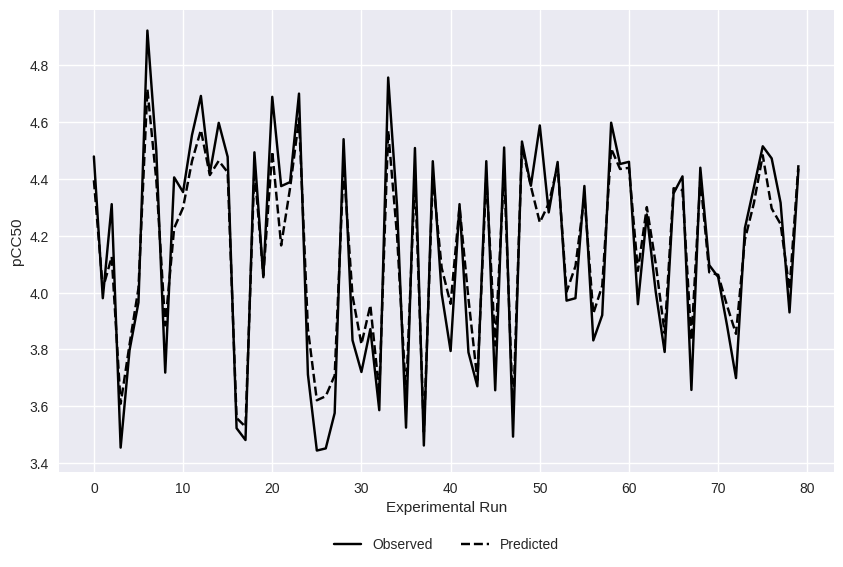

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([4.19997155, 4.17082462, 4.11278054, 4.37772558, 3.8060576 ,
       4.60108561, 4.23289901, 3.88010988, 4.25218828, 4.16269785,
       3.73796388, 4.17699721, 4.15738859, 4.02103851, 4.04571622,
       4.37790051, 3.6860832 , 3.61929731, 4.32100807, 4.23963497])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
83,4.566390,4.199972
53,3.584192,4.170825
70,4.421705,4.112781
45,4.567993,4.377726
44,3.505678,3.806058
39,4.784891,4.601086
22,4.271241,4.232899
80,3.793255,3.880110
10,4.255081,4.252188
0,4.176200,4.162698


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.2934


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.2934


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.2335


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.3602


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.3258


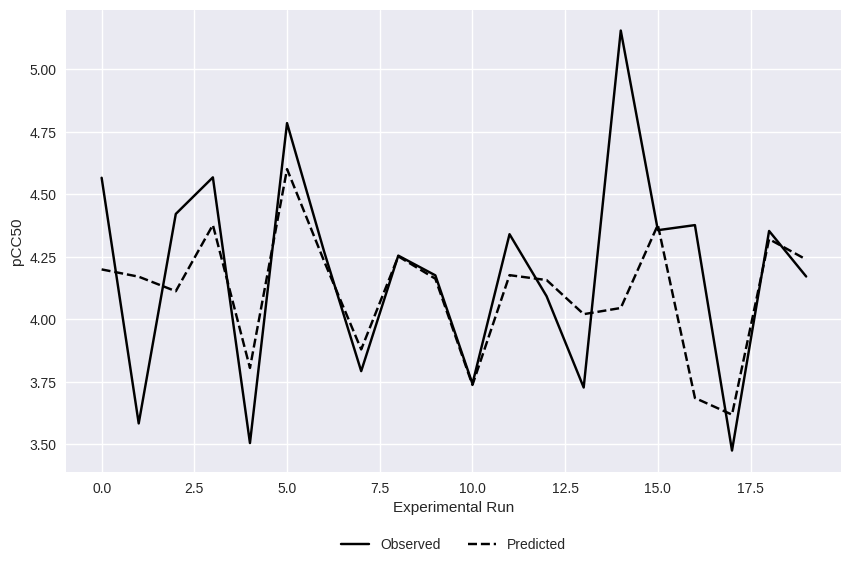

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

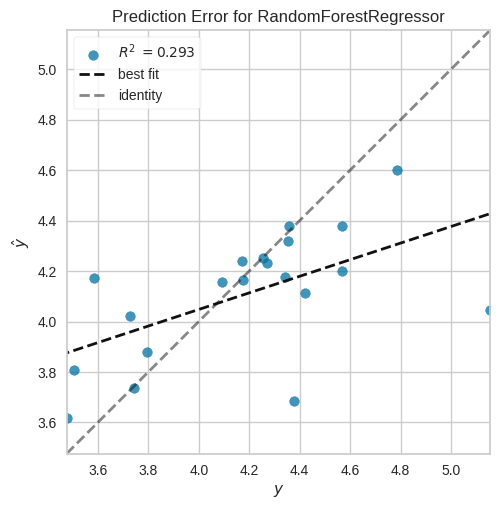

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

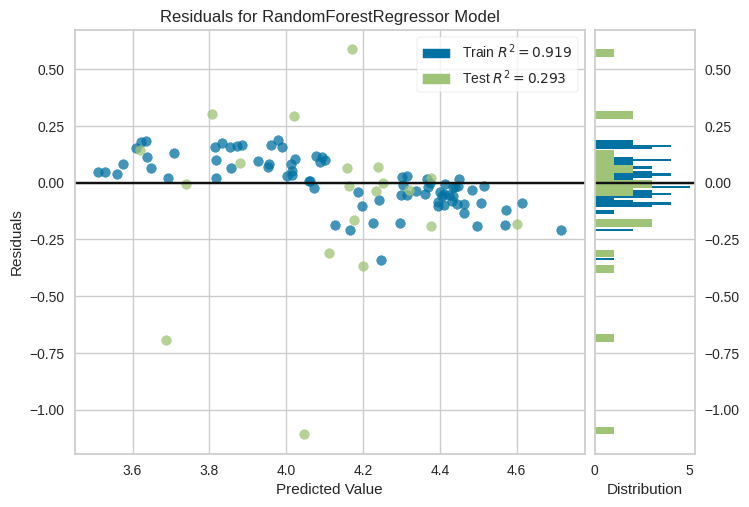

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

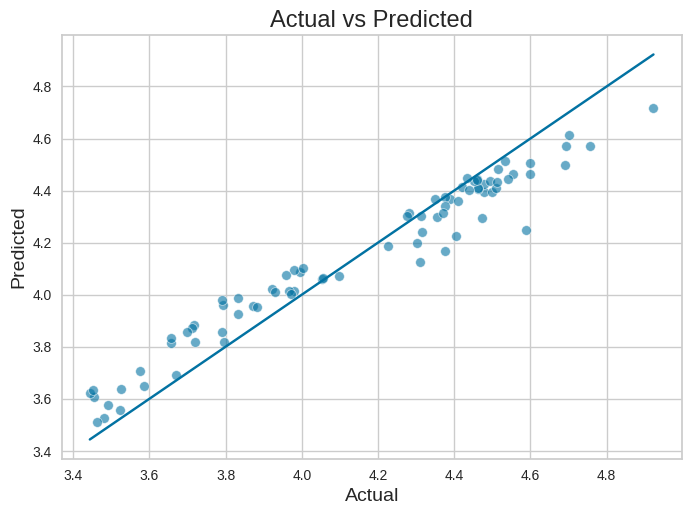

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_pred, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

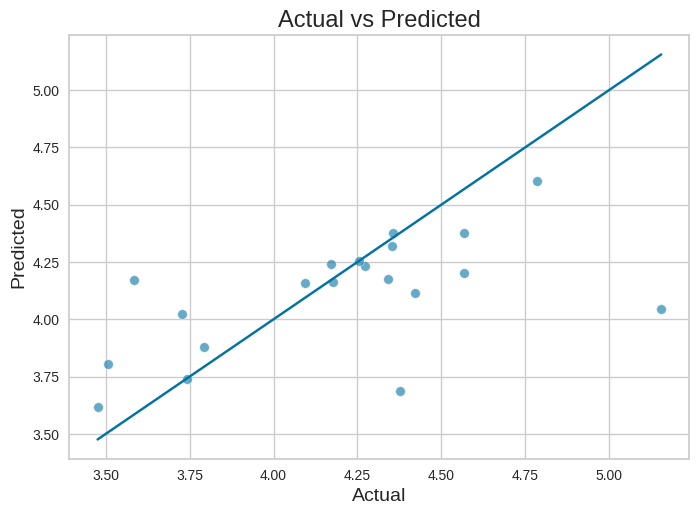

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.2934428707897144

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.36

In [ ]:
my_param_grid = {'n_estimators':[10, 100, 500], 'max_features':['sqrt', 'log2'], 'max_depth': [5,10,20]} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=-0.019 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.409 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.212 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=-0.196 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.088 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.190 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.461 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.440 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.001 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.168 total time=

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([4.22355923, 4.18312047, 4.06935187, 4.3830747 , 3.69214434,
       4.61016607, 4.21814266, 3.88864241, 4.29191643, 4.15639267,
       3.69976782, 4.21499295, 4.1306317 , 4.07549505, 4.05291947,
       4.38170609, 3.70613153, 3.67298276, 4.31726719, 4.19341441])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
83,4.566390,4.199972,4.223559
53,3.584192,4.170825,4.183120
70,4.421705,4.112781,4.069352
45,4.567993,4.377726,4.383075
44,3.505678,3.806058,3.692144


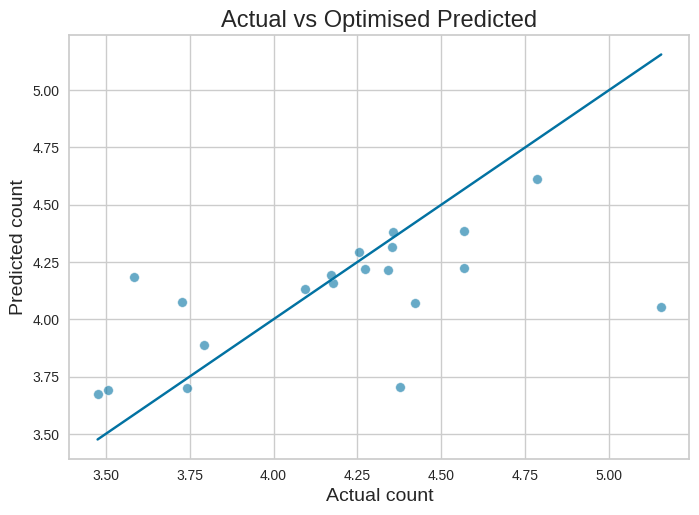

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.3030747358474075

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.36

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.9768


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.2327


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.3577


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.3362


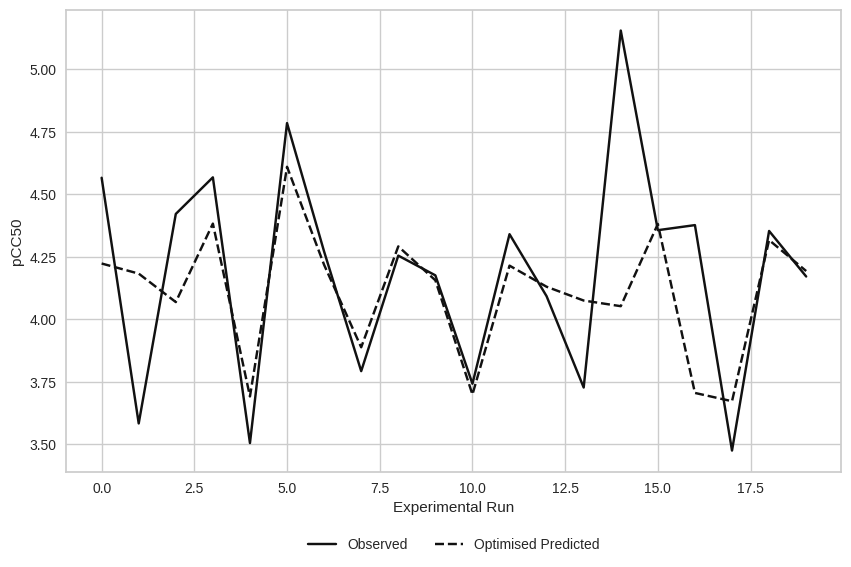

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([4.38182579, 4.02023161, 4.12913528, 3.58357901, 3.7689403 ,
       3.99690514, 4.72304233, 4.43373974, 3.90098111, 4.26271176,
       4.33050469, 4.44901074, 4.56373044, 4.37740681, 4.44885718,
       4.40468162, 3.56196488, 3.50514398, 4.43504727, 4.08617278,
       4.50940283, 4.21337289, 4.36826798, 4.5748721 , 3.92878413,
       3.61706457, 3.61424975, 3.70292858, 4.47649864, 4.03674203,
       3.83742645, 3.98900457, 3.64051483, 4.59468354, 4.20527193,
       3.64282566, 4.42475509, 3.50292876, 4.42484926, 4.11659156,
       3.96163017, 4.2877164 , 3.97467875, 3.66221592, 4.42973591,
       3.79064552, 4.41152944, 3.59754079, 4.50032017, 4.3897833 ,
       4.34306819, 4.29562123, 4.44620249, 3.93490384, 4.07360643,
       4.31787104, 3.90407292, 4.02668553, 4.51643135, 4.42710732,
       4.47499256, 4.0676609 , 4.30414105, 4.0928916 , 3.87278399,
       4.31881485, 4.36909182, 3.85113393, 4.3825543 , 4.07918454,
       4.07180528, 3.90561336, 3.85031216, 4.18349975, 4.28904

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
55,4.479516,4.395525,4.381826
88,3.980344,4.014138,4.020232
26,4.311580,4.126061,4.129135
42,3.454174,3.608672,3.583579
69,3.797239,3.817650,3.768940


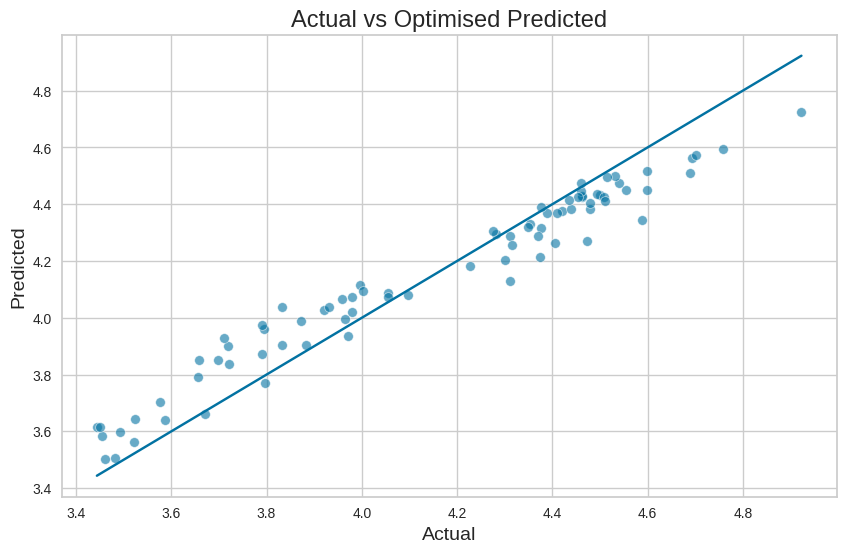

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9926


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.0888


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.1081


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9230


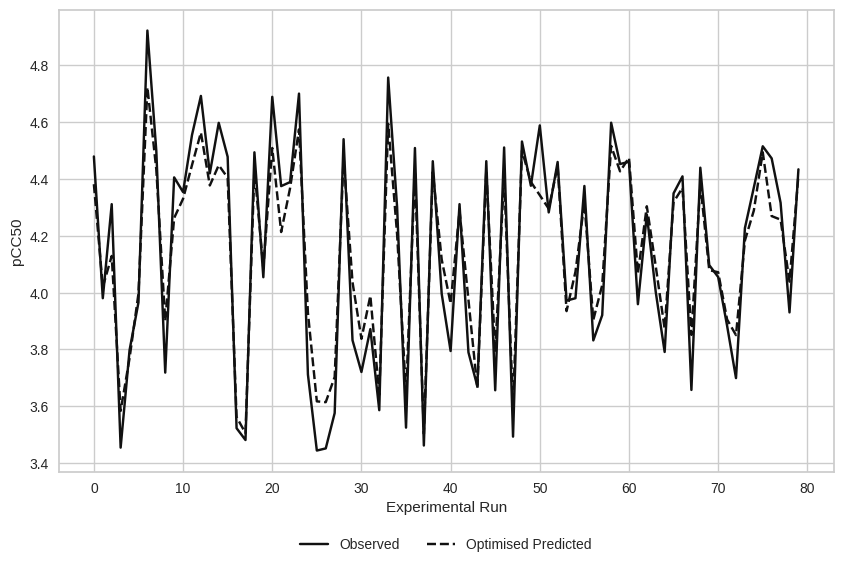

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

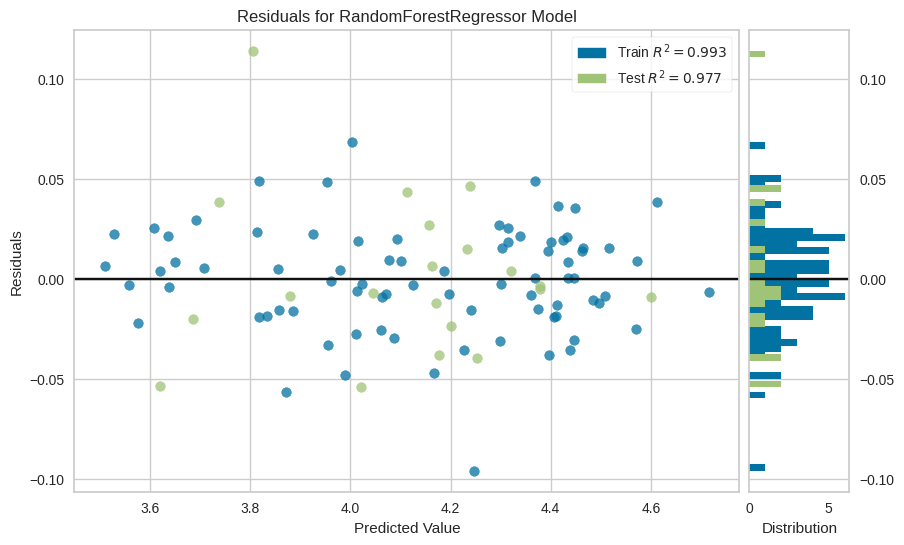

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['ATS5e',
 'ATS8e',
 'ATS7p',
 'ATS8p',
 'ATS2i',
 'ATS8i',
 'AATS8v',
 'AATS3e',
 'AATS7e',
 'ATSC3c',
 'ATSC6m',
 'ATSC2e',
 'ATSC3e',
 'ATSC5e',
 'ATSC7e',
 'ATSC8e',
 'ATSC6p',
 'ATSC4i',
 'AATSC6m',
 'AATSC5v',
 'MATS6c',
 'MATS1m',
 'MATS4m',
 'MATS8m',
 'MATS3e',
 'MATS6e',
 'MATS8e',
 'MATS2p',
 'MATS3p',
 'MATS6p',
 'MATS2i',
 'GATS4c',
 'GATS4m',
 'GATS5m',
 'GATS6m',
 'GATS4v',
 'GATS8v',
 'GATS7p',
 'GATS2i',
 'GATS5i',
 'GATS7i',
 'CrippenLogP',
 'nAtomP',
 'MPC9',
 'piPC7',
 'piPC8',
 'piPC10',
 'R_TpiPCTPC',
 'WTPT-5',
 'XLogP']

In [ ]:
RFR = RandomForestRegressor(random_state=seed, n_estimators = 100, max_features='sqrt', max_depth=10)

In [ ]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

In [ ]:
importance = RFR.feature_importances_
importance

array([0.01373024, 0.02729045, 0.0099273 , 0.01264437, 0.01051608,
       0.02021264, 0.01391918, 0.05629962, 0.01951631, 0.00820305,
       0.019519  , 0.00977491, 0.01356545, 0.01689565, 0.02249146,
       0.01531684, 0.01513115, 0.0165421 , 0.01667335, 0.01200647,
       0.01017856, 0.02091247, 0.03375918, 0.02175008, 0.01470828,
       0.01655244, 0.02481851, 0.0152777 , 0.01184136, 0.00631707,
       0.02775404, 0.00909909, 0.01239565, 0.00549184, 0.00702306,
       0.01644205, 0.02003982, 0.01270222, 0.0120747 , 0.01888953,
       0.01039865, 0.01469845, 0.0219285 , 0.02057209, 0.04875167,
       0.0523398 , 0.04871084, 0.04018631, 0.02904761, 0.04516279])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,ATS5e,0.013730
1,ATS8e,0.027290
2,ATS7p,0.009927
3,ATS8p,0.012644
4,ATS2i,0.010516
5,ATS8i,0.020213
6,AATS8v,0.013919
7,AATS3e,0.056300
8,AATS7e,0.019516
9,ATSC3c,0.008203


<Figure size 8000x4800 with 0 Axes>

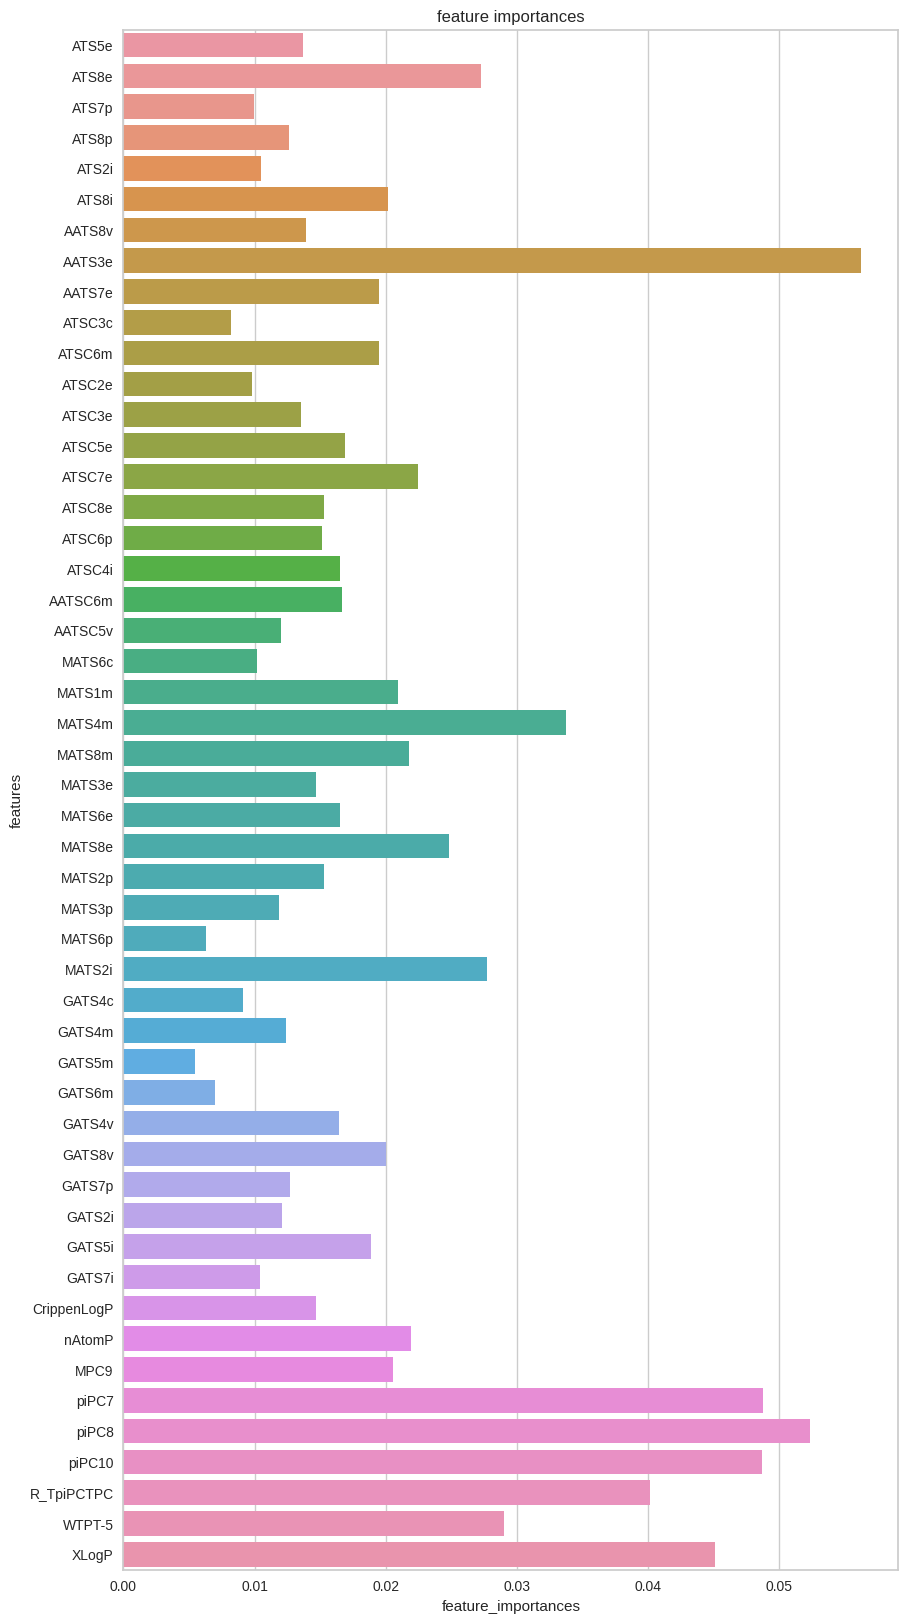

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.savefig('figrfr2.png')

plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 35.9 MB/s eta 0:00:00


In [ ]:
import shap
X = df2.drop(['pCC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

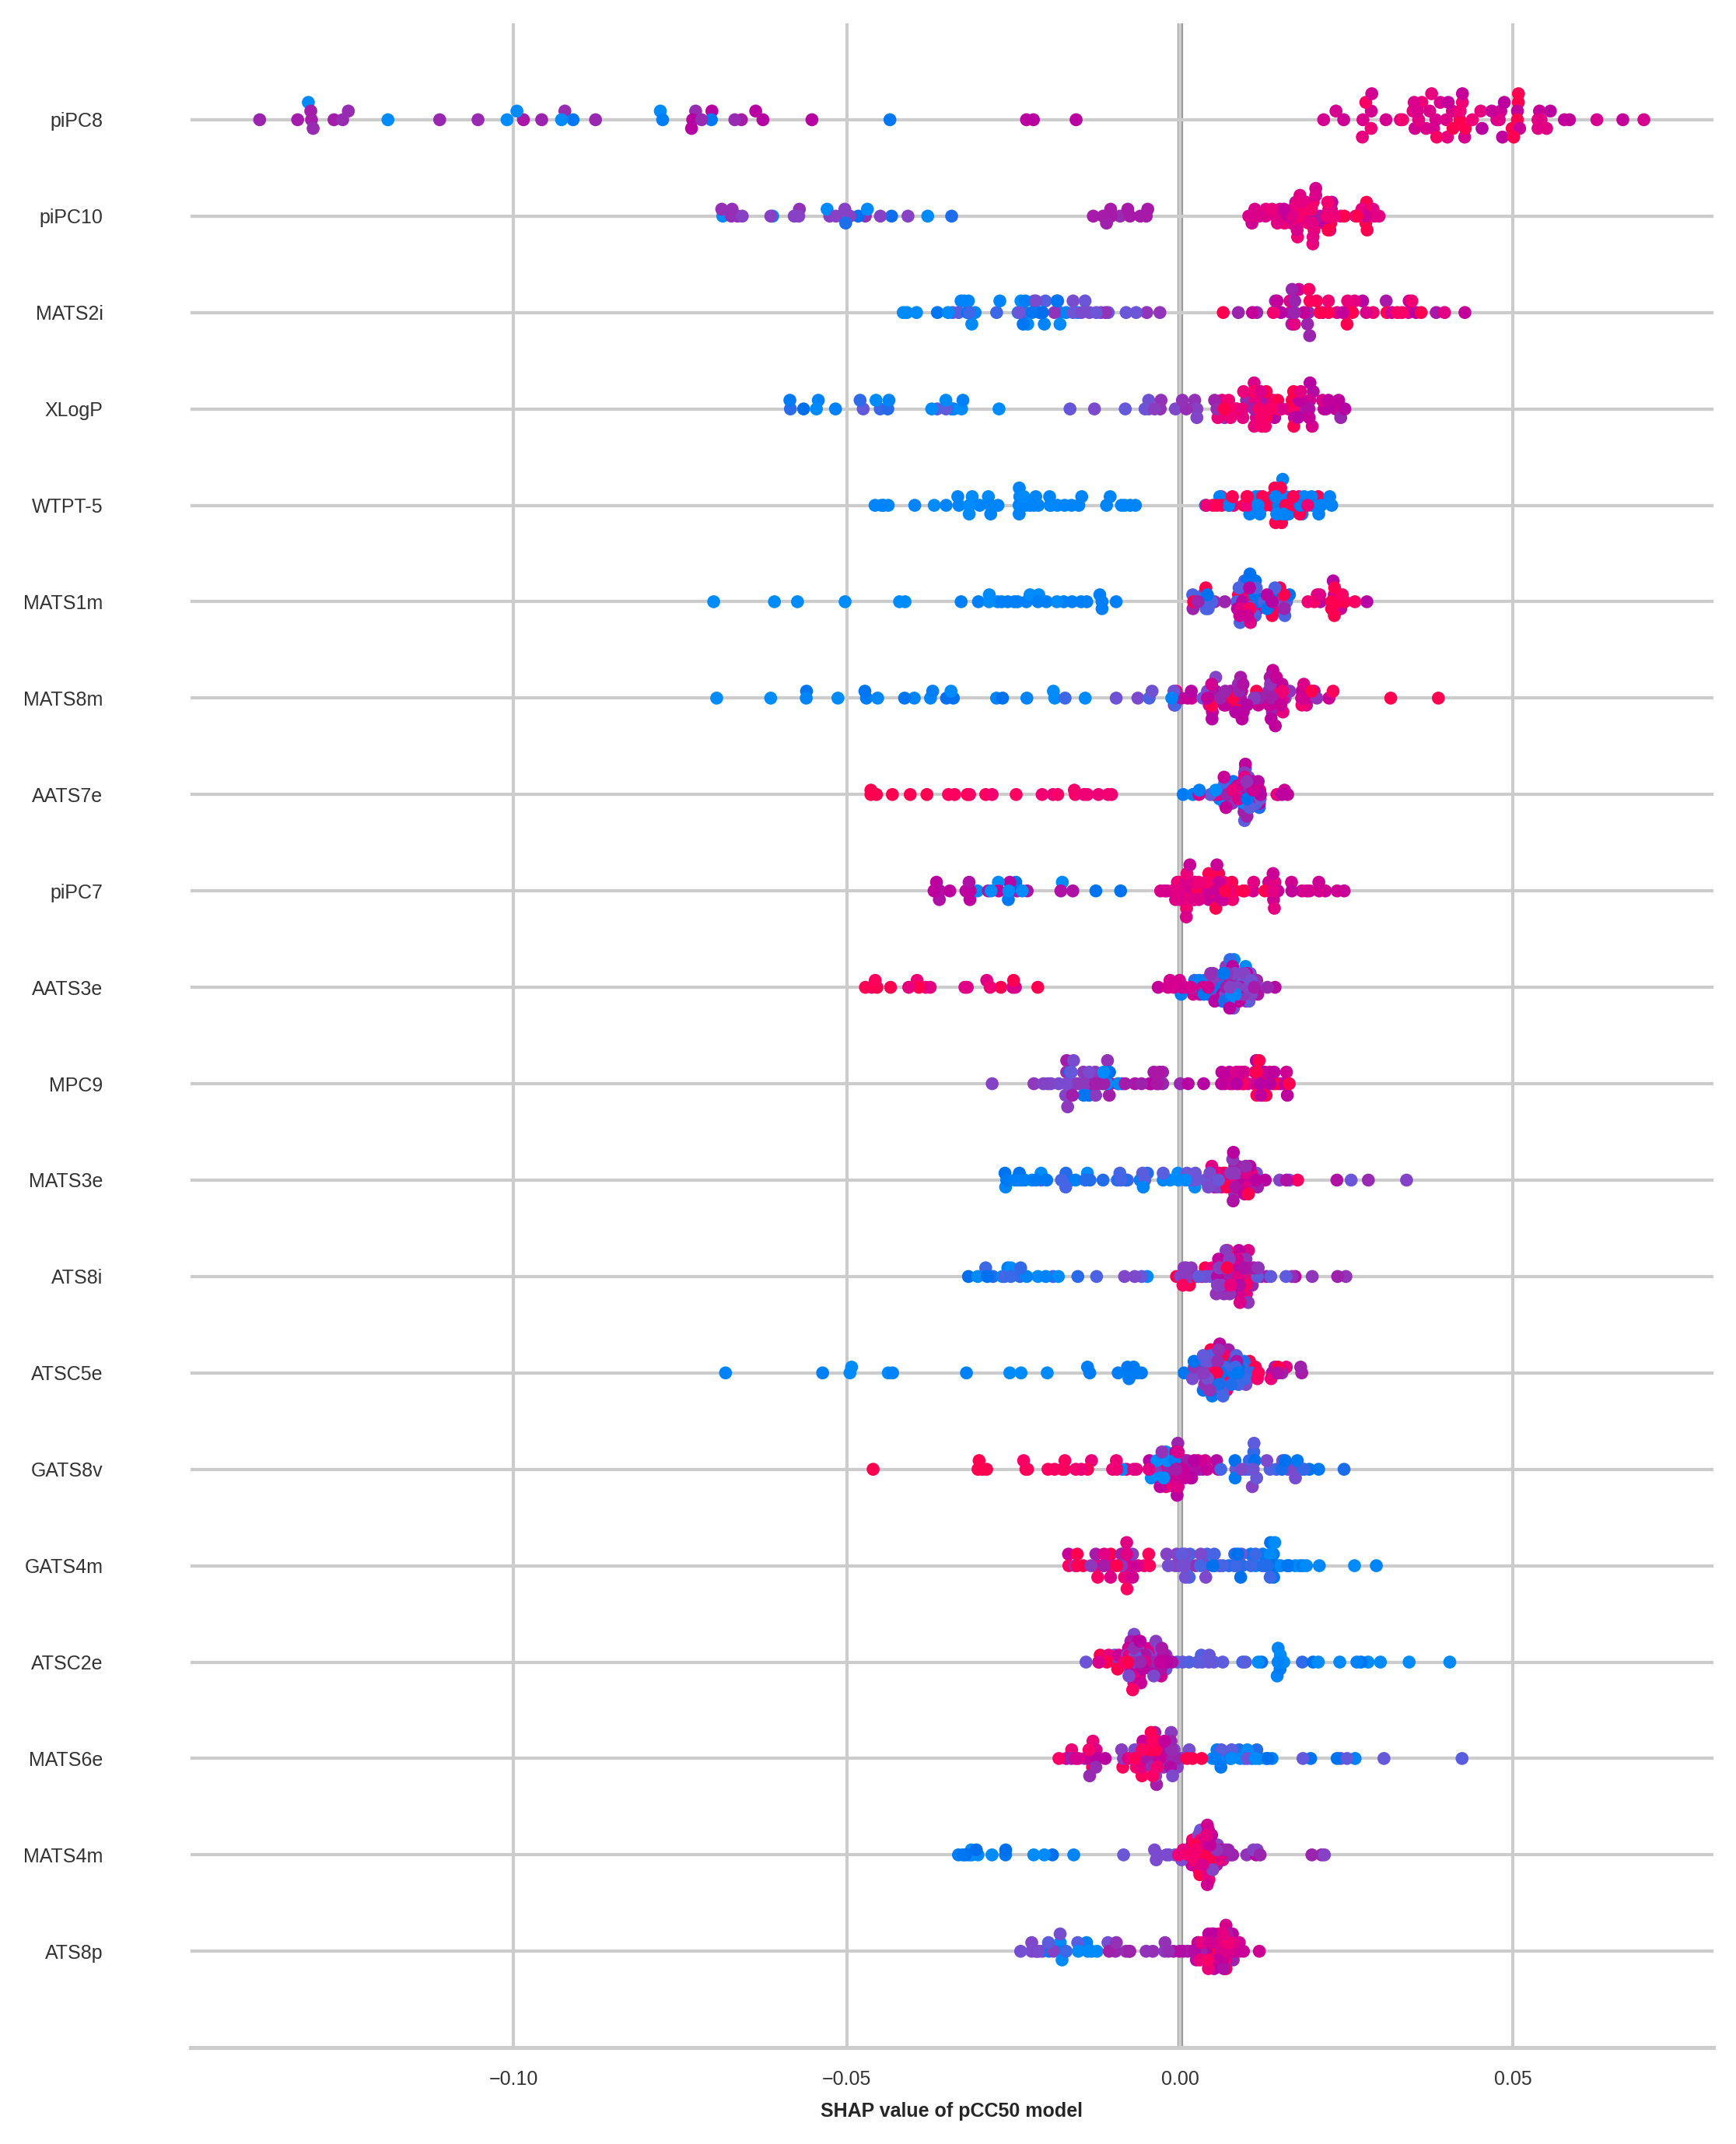

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.savefig('figrfr3.png')

plt.show()